In [ ]:
!pip install transformers
!pip install sentence-transformers

     |████████████████████████████████| 4.4 MB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 859 kB/s  eta 0:00:01
     |████████████████████████████████| 764 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 1.7 MB/s eta 0:00:01
ERROR: huggingface-hub 0.8.1 has requirement packaging>=20.9, but you'll have packaging 20.3 which is incompatible.
     |████████████████████████████████| 85 kB 723 kB/s  eta 0:00:01
     |████████████████████████████████| 1.5 MB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 31.2 MB 183 kB/s  eta 0:00:01
     |████████████████████████████████| 41.6 MB 54 kB/s s eta 0:00:01
     |████████████████████████████████| 1.2 MB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 776.3 MB 3.6 kB/s  eta 0:00:01��█████████████▏              | 416.1 MB 10.6 MB/s eta 0:00:35
     |████████████████████████████████| 19.1 MB 12.4 MB/s eta 

In [ ]:
pip install tensorflow

     |████████████████████████████████| 511.7 MB 11 kB/s s eta 0:00:01    |██▌                             | 40.7 MB 12.3 MB/s eta 0:00:39     |████████████████████▏           | 321.7 MB 12.4 MB/s eta 0:00:16
     |████████████████████████████████| 42 kB 134 kB/s  eta 0:00:01
     |████████████████████████████████| 81 kB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 455 kB/s  eta 0:00:01
     |████████████████████████████████| 438 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 1.1 MB/s  eta 0:00:01
     |█████████████████████████████

In [ ]:
pip install matplotlib

  Using cached matplotlib-3.5.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached kiwisolver-1.4.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

import collections
import random
import numpy as np
import os
import time
import json
import pandas as pd
from PIL import Image

2022-07-03 23:52:25.703846: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-03 23:52:25.703871: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
# Download caption annotation files
annotation_folder = '/annotations/'
if not os.path.exists(os.path.abspath('.') + annotation_folder):
  annotation_zip = tf.keras.utils.get_file('captions.zip',
                                           cache_subdir=os.path.abspath('.'),
                                           origin='http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
                                           extract=True)
  annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'
  os.remove(annotation_zip)

In [ ]:
# Download image files
image_folder = '/train2014/'
if not os.path.exists(os.path.abspath('.') + image_folder):
  image_zip = tf.keras.utils.get_file('train2014.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin='http://images.cocodataset.org/zips/train2014.zip',
                                      extract=True)
  PATH = os.path.dirname(image_zip) + image_folder
  os.remove(image_zip)
else:
  PATH = os.path.abspath('.') + image_folder

In [ ]:
annotation_file = 'annotations/captions_train2014.json'


In [ ]:
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

In [ ]:
# Group all captions together having the same image ID.
image_path_to_caption = collections.defaultdict(list)
for val in annotations['annotations']:
  caption = f"<start> {val['caption']} <end>"
  image_path = PATH + 'COCO_train2014_' + '%012d.jpg' % (val['image_id'])
  image_path_to_caption[image_path].append(caption)

In [ ]:
# extract all unique image paths
img_paths = list(image_path_to_caption.keys())
len(img_paths),len(image_path_to_caption)

(82783, 82783)

In [ ]:
for img in img_paths:
  image_path_to_caption[img] = [image_path_to_caption[img]]
  image_path_to_caption[img].append(1)

[['<start> A very clean and well decorated empty bathroom <end>', '<start> A blue and white bathroom with butterfly themed wall tiles. <end>', '<start> A bathroom with a border of butterflies and blue paint on the walls above it. <end>', '<start> An angled view of a beautifully decorated bathroom. <end>', '<start> A clock that blends in with the wall hangs in a bathroom.  <end>'], 1]


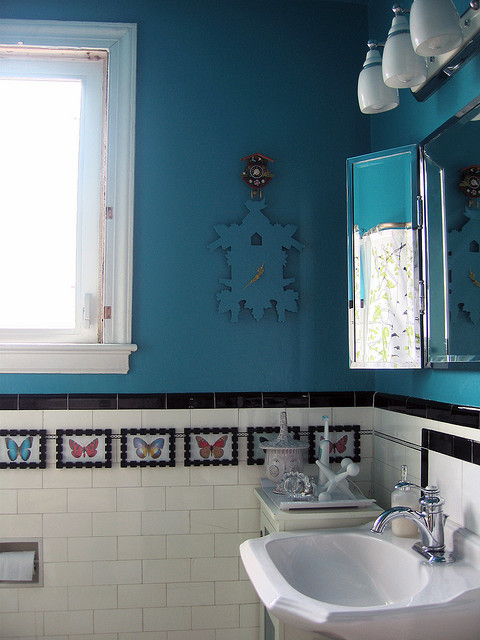

In [ ]:
print(image_path_to_caption[img_paths[0]])
Image.open(img_paths[0])

In [ ]:
image_paths = list(image_path_to_caption.keys())
random.shuffle(image_paths)

# Select the first 3000 image_paths from the shuffled set.
# Approximately each image id has 5 captions associated with it, so that will lead to 15,000 examples.
train_image_paths = image_paths[:5000]
print(len(train_image_paths))

5000


In [ ]:
train_captions = []
img_name_vector = []
consistency_list = []

for ipath in train_image_paths:
  caption_list = image_path_to_caption[ipath][0]
  train_captions.extend(caption_list)
  img_name_vector.extend([ipath] * len(caption_list))

for i in range(len(train_captions)):
  consistency_list.append(1)

In [ ]:
len(train_captions),len(img_name_vector),len(consistency_list)

(25013, 25013, 25013)

In [ ]:
# negative sampling
shuffle_captions = train_captions.copy()
# random.shuffle(shuffle_captions)
# random.shuffle(shuffle_captions)
# shuffle_captions = shuffle_captions[0:8000]
shuffle_images = img_name_vector.copy()
# random.shuffle(shuffle_images)
# random.shuffle(shuffle_images)
# shuffle_images = shuffle_images[0:8000]
# len(shuffle_captions),len(shuffle_images)

# using Fisher–Yates shuffle Algorithm
# to shuffle a list
for i in range(len(shuffle_captions)-1, 0, -1):
     
    # Pick a random index from 0 to i
    j = random.randint(0, i + 1)
   
    # Swap arr[i] with the element at random index
    shuffle_captions[i], shuffle_captions[j] = shuffle_captions[j], shuffle_captions[i]

for i in range(len(shuffle_images)-1, 0, -1):
     
    # Pick a random index from 0 to i
    j = random.randint(0, i + 1)
   
    # Swap arr[i] with the element at random index
    shuffle_images[i], shuffle_images[j] = shuffle_images[j], shuffle_images[i]

shuffle_images = shuffle_images[0:15000]
shuffle_captions = shuffle_captions[0:15000]

<start> A zebra standing by a pile of large rocks. <end>


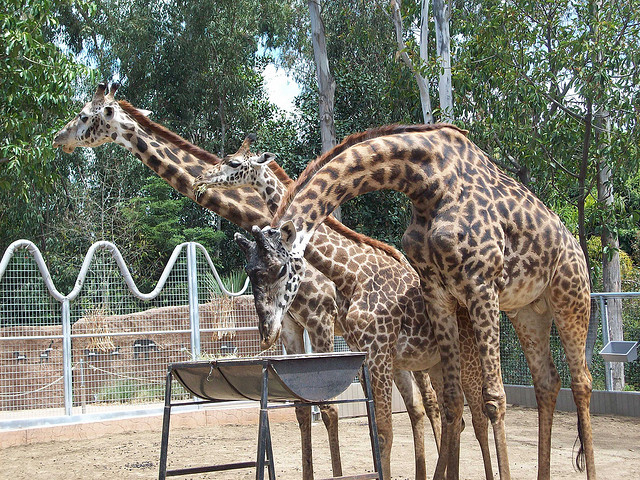

In [ ]:
print(shuffle_captions[1])
Image.open(shuffle_images[1])

In [ ]:
inconsistency_list = []
for i in range(len(shuffle_images)):
  inconsistency_list.append(0)

In [ ]:
len(train_captions),len(img_name_vector),len(shuffle_captions),len(shuffle_images)

(25013, 25013, 15000, 15000)

In [ ]:
train_captions = train_captions + shuffle_captions
img_name_vector = img_name_vector + shuffle_images
consistency_list = consistency_list + inconsistency_list

In [ ]:
len(train_captions),len(img_name_vector),len(consistency_list)

(40013, 40013, 40013)

In [ ]:
train_dataset = list(zip(img_name_vector,train_captions,consistency_list))
# random.shuffle(train_dataset)
for i in range(len(train_dataset)-1, 0, -1):
     
    # Pick a random index from 0 to i
    j = random.randint(0, i + 1)
   
    # Swap arr[i] with the element at random index
    train_dataset[i], train_dataset[j] = train_dataset[j], train_dataset[i]

img_name_vector,train_captions,consistency_list = zip(*train_dataset)
img_name_vector,train_captions,consistency_list = list(img_name_vector),list(train_captions),list(consistency_list)

In [ ]:
len(train_dataset)

40013

<start> A compact style bathroom with the toilet and sink in the wall along with cabinets on the wall. <end> 1


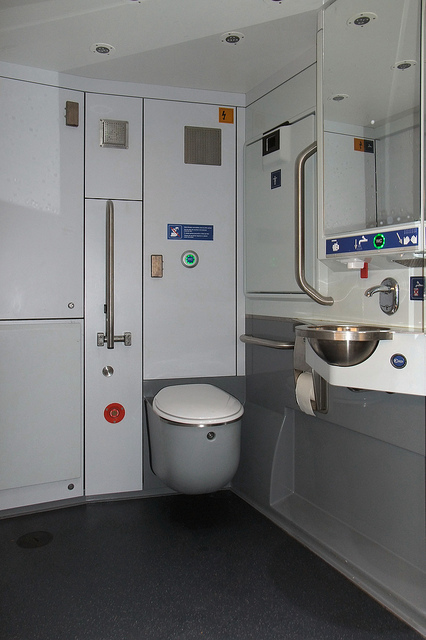

In [ ]:
print(train_captions[31403],consistency_list[31403],)
Image.open(img_name_vector[31403])

In [ ]:
train_df = pd.DataFrame(
    {'ImagePath': img_name_vector,
     'ImageCaption': train_captions,
     'ConsistencyScore': consistency_list
    })
train_df

,ImagePath,ImageCaption,ConsistencyScore
0,/home/vinayak/RnD/dlnlp/train2014/COCO_train20...,<start> A woman bending over a boat sitting on...,1
1,/home/vinayak/RnD/dlnlp/train2014/COCO_train20...,<start> Two teddy bears are dressed like a bri...,0
2,/home/vinayak/RnD/dlnlp/train2014/COCO_train20...,<start> 4 people on skateboards an one empty s...,0
3,/home/vinayak/RnD/dlnlp/train2014/COCO_train20...,"<start> A large breakfast of eggs benedict, fr...",1
4,/home/vinayak/RnD/dlnlp/train2014/COCO_train20...,<start> A nice open living room with hard wood...,1
5,/home/vinayak/RnD/dlnlp/train2014/COCO_train20...,<start> Group of motorcycles at a convention d...,0
6,/home/vinayak/RnD/dlnlp/train2014/COCO_train20...,<start> a man that is sitting on a motorcycle ...,1
7,/home/vinayak/RnD/dlnlp/train2014/COCO_train20...,<start> A men at work sign is by a bull dozer....,1
8,/home/vinayak/RnD/dlnlp/train2014/COCO_train20...,<start> There is a close up picture of a cake ...,1
9,/home/vinayak/RnD/dlnlp/train2014/COCO_train20...,<start> A little boy that is standing near a t...,1


In [ ]:
train_df.iloc[30010]

ImagePath           /home/vinayak/RnD/dlnlp/train2014/COCO_train20...
ImageCaption        <start> A brown cow standing above a white cow...
ConsistencyScore                                                    0
Name: 30010, dtype: object

In [ ]:
train_df.to_csv("df_dataset")

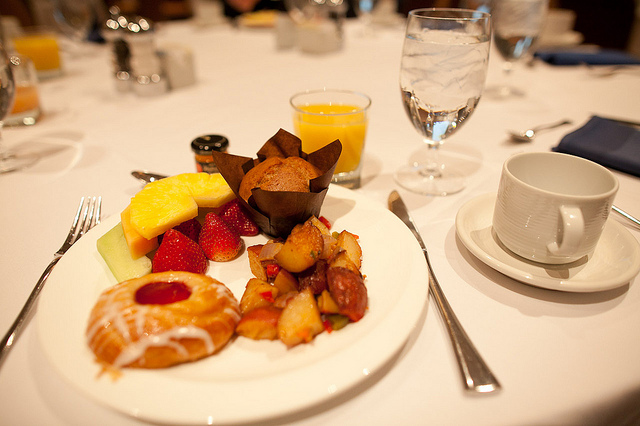

In [ ]:
Image.open(train_df['ImagePath'][30010])

In [ ]:
print(train_df['ImagePath'][0])
# print(train)

/home/vinayak/RnD/dlnlp/train2014/COCO_train2014_000000199126.jpg


In [ ]:
!pip install tensorflow_hub

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import tensorflow_hub as hub
module_url= "https://tfhub.dev/google/universal-sentence-encoder/4"
smodel= hub.load(module_url)

query= "I had pizza and pasta"
query_vec= smodel([query])[0]

print(query_vec.shape)


(512,)


In [ ]:
import torch
import torchvision
import torchvision.models as models
from PIL import Image


# Load the pretrained model
model = models.resnet18(pretrained=True)
layer = model._modules.get('avgpool')
model.eval()

transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


def get_vector(image):
    image = Image.open(image).convert('RGB')
    t_img = transforms(image)
    my_embedding = torch.zeros(512)
    def copy_data(m, i, o):
        my_embedding.copy_(o.flatten())                 # <-- flatten
    h = layer.register_forward_hook(copy_data)
  
    with torch.no_grad():                               # <-- no_grad context
        model(t_img.unsqueeze(0))                       # <-- unsqueeze
  
    h.remove()
   
    return my_embedding




In [ ]:
get_vector(train_df['ImagePath'][450])

tensor([1.1169e+00, 1.5088e+00, 6.4896e-01, 5.3242e-02, 8.5620e-01, 1.4778e+00,
        3.8932e-01, 7.2737e-01, 1.4619e+00, 1.3757e+00, 7.5805e-01, 8.0012e-01,
        1.1416e+00, 5.4575e-01, 7.3434e-01, 1.9495e-01, 1.0449e-01, 1.0901e+00,
        5.6160e-01, 3.3767e-01, 2.5250e-01, 6.4724e-01, 6.4917e-01, 1.5902e+00,
        6.3140e-01, 9.2325e-01, 1.1376e+00, 5.6370e-01, 1.9837e-01, 3.4152e-01,
        2.3776e-01, 3.9749e-02, 5.4018e-01, 4.6193e-01, 5.0301e-01, 6.9186e-01,
        4.2559e+00, 1.4527e+00, 2.9917e-01, 6.0281e-01, 5.5078e-01, 1.1522e+00,
        8.0077e-01, 1.5159e+00, 1.3934e+00, 1.4921e+00, 8.8925e-01, 2.4582e+00,
        6.7421e-01, 7.8050e-01, 1.5594e+00, 4.2669e-02, 1.4986e-01, 1.6560e+00,
        5.8910e-02, 1.9264e+00, 9.7798e-01, 6.6717e-01, 9.9544e-01, 5.6393e-01,
        2.4761e-01, 4.3305e-01, 9.1770e-01, 7.6563e-02, 1.2547e+00, 1.4770e-01,
        3.3615e+00, 7.1224e-01, 3.3160e-01, 8.8921e-01, 5.6185e-01, 5.4756e-02,
        1.2873e+00, 9.3022e-01, 6.3156e-

In [ ]:
def get_embed(image_path,caption):
    image_vector = get_vector(image_path)
    sent_vector = smodel([caption])[0]
    sent_vector = torch.tensor(sent_vector.numpy())
    output = torch.cat([sent_vector,image_vector] , dim=0)
    return output


print(get_embed(train_df['ImagePath'][450], train_df['ImageCaption'][450]))

NameError: name 'smodel' is not defined

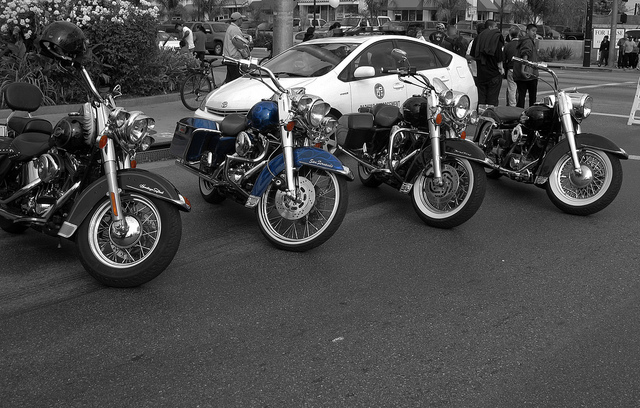

In [ ]:
Image.open(train_df['ImagePath'][450]).convert('RGB')

In [ ]:
print(get_embed(train_df['ImagePath'][0],train_df['ImageCaption'][0]).shape)
print(get_embed(train_df['ImagePath'][0],train_df['ImageCaption'][0]).shape)


torch.Size([1024])
torch.Size([1024])


In [ ]:
print(train_df.shape[0])

40010


In [ ]:

print(train_df.shape[0])
concatenated_embedding = []
for i in range(train_df.shape[0]):
  concatenated_embedding.append(embed(train_df['ImagePath'][i],train_df['ImageCaption'][i]))
  if(i%100==0):
    print(i)

40010
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18

In [ ]:
concatenated_embedding

[tensor([-0.0492,  0.0348,  0.0594,  ...,  2.8076,  0.4185,  0.3369]),
 tensor([-0.0270,  0.0632, -0.0191,  ...,  1.5473,  0.5658,  0.6841]),
 tensor([0.0144, 0.0364, 0.0461,  ..., 0.3956, 0.8207, 0.0193]),
 tensor([-0.0525,  0.0569,  0.0118,  ...,  0.2821,  0.9438,  0.7770]),
 tensor([ 0.0141, -0.0168,  0.0848,  ...,  1.9093,  0.2506,  1.1603]),
 tensor([-0.0538,  0.0807,  0.0361,  ...,  0.7582,  0.1508,  0.8187]),
 tensor([-0.0353,  0.0830, -0.0435,  ...,  0.3774,  0.2985,  0.1236]),
 tensor([ 0.0177,  0.0551, -0.0066,  ...,  0.3288,  0.5722,  0.3390]),
 tensor([ 0.0145,  0.0440, -0.0359,  ...,  0.5800,  0.5622,  1.1922]),
 tensor([0.0479, 0.0244, 0.0400,  ..., 0.2695, 1.8750, 0.8368]),
 tensor([ 0.0119,  0.0575, -0.0638,  ...,  0.9685,  0.6912,  1.4500]),
 tensor([-0.0073,  0.0578, -0.0836,  ...,  1.1858,  0.5185,  0.0840]),
 tensor([-2.3716e-04,  1.2591e-03,  1.5418e-02,  ...,  8.7354e-01,
          5.2446e+00,  1.0339e+00]),
 tensor([ 0.0125,  0.0370, -0.0158,  ...,  0.4490,  0.10

In [ ]:
data = np.array(concatenated_embedding)

np.save("dataPhd",data)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
ls

annotations/    data.npy     df_dataset  dlnlp.ipynb  file.csv
dataMonday.npy  dataPhd.npy  dlbck.ipny  dlnlp.py     train2014/


In [ ]:
newdata = np.load('dataPhd.npy',allow_pickle=True)

/home/vivek/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
newdata

array([tensor([-0.0492,  0.0348,  0.0594,  ...,  2.8076,  0.4185,  0.3369]),
       tensor([-0.0270,  0.0632, -0.0191,  ...,  1.5473,  0.5658,  0.6841]),
       tensor([0.0144, 0.0364, 0.0461,  ..., 0.3956, 0.8207, 0.0193]),
       ...,
       tensor([7.8814e-04, 7.6916e-02, 3.7679e-02,  ..., 1.4116e+00, 8.2538e-01,
               2.2821e+00])                                                     ,
       tensor([-0.0727,  0.0399,  0.0630,  ...,  0.1324,  1.3337,  2.9539]),
       tensor([0.0061, 0.0270, 0.0207,  ..., 0.1965, 0.5313, 0.0094])],
      dtype=object)

In [ ]:
embed = [] 
for i in newdata:
    embed.append(i.tolist())

In [ ]:
embed = torch.tensor(embed)


NameError: name 'torch' is not defined

In [ ]:
embed.shape

In [ ]:
ls


In [ ]:
train_df = pd.read_csv("file.csv")

In [ ]:
len(train_df)

40010

In [ ]:
score = torch.tensor(train_df['ConsistencyScore'],dtype=torch.float32)

NameError: name 'torch' is not defined

In [ ]:
score.shape

torch.Size([40010])

In [ ]:
train_x = embed[:35000] 
train_y = score[:35000]
test_x = embed[35000:]
test_y = score[35000:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

torch.Size([35000, 1024])
torch.Size([35000])
torch.Size([5010, 1024])
torch.Size([5010])


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

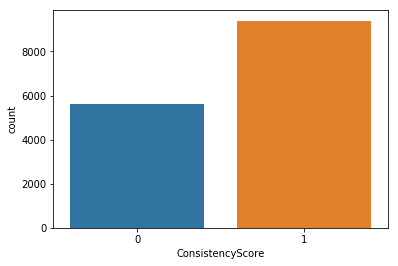

In [ ]:
sns.countplot(x = 'ConsistencyScore', data=train_df[25000:])


In [ ]:
class TrainData(Dataset):
    
    def __init__(self,concatenated_embedding,score):

        self.X_data = concatenated_embedding
        self.y_data = torch.tensor(score , dtype=torch.float32)
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(train_x,train_y)
test_data = TrainData(test_x,test_y)

    

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [ ]:
train_data[33][0].shape

torch.Size([1024])

In [ ]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1, shuffle=True)

In [ ]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(1024, 1024)
        self.layer_2 = nn.Linear(1024, 512)
        self.layer_3 = nn.Linear(512, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(1024)
        self.batchnorm2 = nn.BatchNorm1d(512)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        #x = self.dropout(x)
        x = self.layer_out(x)
        x = self.sigmoid(x)
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1 = BinaryClassification()
model1.to(device)
print(model)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(y_pred)

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()

        y_pred = model1(X_batch.float())
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

AttributeError: 'Tensor' object has no attribute 'zero_grad'

In [ ]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
          
        X_batch = torch.tensor(X_batch[0].float())
        print(X_batch.shape)
        print(X_batch)
        #break
        X_batch = X_batch.to(device)
        y_test_pred = model1(X_batch)
        #y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

torch.Size([1, 1024])
tensor([[0.0106, 0.0544, 0.0286,  ..., 2.1099, 1.2080, 1.6537]])


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 1024]

In [ ]:
# predict = np.array(y_pred_list)

# cc =[]

# for i in predict:
#     for k in i:
#         cc.append(k)
# cc = torch.tensor(cc)

# cc.shape
#y_pred_list = torch.tensor(y_pred_list)

In [ ]:
confusion_matrix(test_y, y_pred_list)


array([[1518, 4096],
       [2577, 6819]])

In [ ]:
print(classification_report(test_y, y_pred_list))


              precision    recall  f1-score   support

         0.0       0.37      0.27      0.31      5614
         1.0       0.62      0.73      0.67      9396

    accuracy                           0.56     15010
   macro avg       0.50      0.50      0.49     15010
weighted avg       0.53      0.56      0.54     15010



In [ ]:
inf= get_embed(train_df['ImagePath'][34],train_df['ImageCaption'][34])

In [ ]:
tinf=[]
for i in inf:
    tinf.append(i)
tinf = torch.tensor([tinf])

In [ ]:
tinf

tensor([[ 1.7574e-02, -7.6443e-02, -1.7892e-04,  ...,  2.0682e+00,
          1.5301e-01,  1.1462e+00]])

In [ ]:
model(tinf.float().to(device))

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 1024]

In [ ]:
################TRy Keras ############

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
...

Ellipsis

In [ ]:
import torch
import tensorflow as tf

train_x = train_x.numpy()
train_x = tf.convert_to_tensor(train_x)

test_x = test_x.numpy()
test_x = tf.convert_to_tensor(test_x)

train_y = train_y.numpy()
train_y = tf.convert_to_tensor(train_y)

test_y = test_y.numpy()
test_y = tf.convert_to_tensor(test_y)



In [ ]:
import keras
model_keras = keras.Sequential([
    keras.layers.Flatten(input_shape=(1024,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
	keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [ ]:
model_keras.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
X_train = train_x
y_train = train_y
X_test = test_x
y_test = test_y
model_keras.fit(X_train, y_train, epochs=50, batch_size=64)


Epoch 1/50
547/547 [==============================] - 3s 4ms/step - loss: 0.6677 - accuracy: 0.6208
Epoch 2/50
547/547 [==============================] - 2s 4ms/step - loss: 0.4908 - accuracy: 0.7765
Epoch 3/50
547/547 [==============================] - 2s 4ms/step - loss: 0.3523 - accuracy: 0.8561
Epoch 4/50
547/547 [==============================] - 2s 4ms/step - loss: 0.2925 - accuracy: 0.8875
Epoch 5/50
547/547 [==============================] - 2s 4ms/step - loss: 0.2549 - accuracy: 0.9031
Epoch 6/50
547/547 [==============================] - 2s 4ms/step - loss: 0.2316 - accuracy: 0.9135
Epoch 7/50
547/547 [==============================] - 2s 4ms/step - loss: 0.2087 - accuracy: 0.9230
Epoch 8/50
547/547 [==============================] - 2s 4ms/step - loss: 0.1923 - accuracy: 0.9297
Epoch 9/50
547/547 [==============================] - 2s 4ms/step - loss: 0.1808 - accuracy: 0.9336
Epoch 10/50
547/547 [==============================] - 2s 4ms/step - loss: 0.1652 - accuracy: 0.9398

In [ ]:
model_keras = tf.keras.models.load_model("keras")

In [ ]:
test_loss, test_acc = model_keras.evaluate(test_x, test_y)
#test_x.shape
#test_y.shape

157/157 [==============================] - 1s 2ms/step - loss: 0.3681 - accuracy: 0.9248


In [ ]:
score = model_keras.evaluate(test_x, test_y,verbose=1)
print(score)

157/157 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.9248
[0.368071585893631, 0.9247505068778992]


In [ ]:
test_predict = model_keras.predict(test_x)

In [ ]:
test_predict = torch.tensor(test_predict)

In [ ]:
predict=[]
for i in test_predict:
    predict.append(torch.round(i))

In [ ]:
predict

[tensor([0.]),
 tensor([1.]),
 tensor([0.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([0.]),
 tensor([0.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([0.]),
 tensor([1.]),
 tensor([1.]),
 tensor([0.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([0.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([0.]),
 tensor([0.]),
 tensor([0.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([0.]),
 tensor([1.]),
 tensor([0.]),
 tensor([0.]),
 tensor([0.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([0.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([0.]),
 tensor([1.]),
 tensor([0.]),
 tensor([0.]),
 tensor([0.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([1.]),
 tensor([0.]),
 tensor([1.]),
 tensor([0.]),
 tensor([0.]),
 tensor([1.]),
 tensor([0

In [ ]:
print(classification_report(test_y, torch.tensor(predict)))


              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90      1869
         1.0       0.93      0.95      0.94      3141

    accuracy                           0.92      5010
   macro avg       0.92      0.91      0.92      5010
weighted avg       0.92      0.92      0.92      5010



In [ ]:
test_x.shape
test_predict = model_keras.predict(test_x)

In [ ]:
confusion_matrix(test_y, torch.tensor(predict))


array([[1637,  232],
       [ 145, 2996]])

In [ ]:
type(test_x),test_x[0].shape,type(test_x[0])

(tensorflow.python.framework.ops.EagerTensor,
 TensorShape([1024]),
 tensorflow.python.framework.ops.EagerTensor)

In [ ]:
model_keras.save('keras')

INFO:tensorflow:Assets written to: keras/assets


INFO:tensorflow:Assets written to: keras/assets


In [ ]:
# for i in test_x[0]:
#     print(i.float())
# model.predict([test_x[0]])

train_df


model_keras.predict(tf.expand_dims(test_x[0],axis=0))
# tf.expand_dims(test_x[0],axis=0)

array([[1.20797695e-05]], dtype=float32)

<start> A clock tower stand close to the lake in a grassy field. <end>


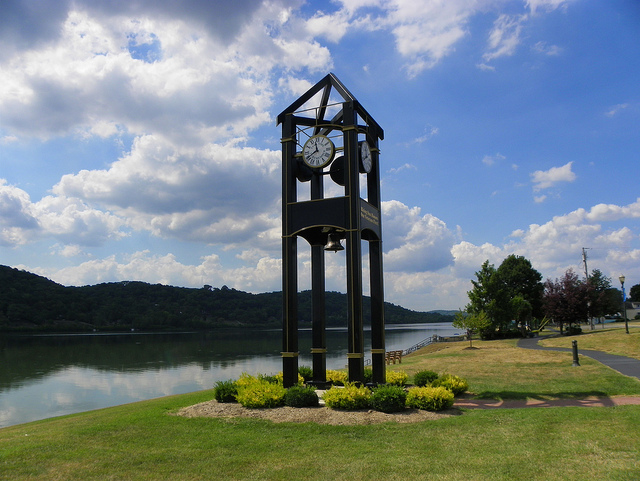

In [ ]:
print(train_df['ImageCaption'][33131] )
Image.open(train_df['ImagePath'][33131])



# Inference 

In [ ]:
import torch
import torchvision
import torchvision.models as models
from PIL import Image
import tensorflow_hub as hub
module_url= "https://tfhub.dev/google/universal-sentence-encoder/4"
smodel= hub.load(module_url)

# Load the pretrained model
model = models.resnet18(pretrained=True)
layer = model._modules.get('avgpool')
model.eval()

transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def get_vector(image):
    image = Image.open(image).convert('RGB')
    t_img = transforms(image)
    my_embedding = torch.zeros(512)
    def copy_data(m, i, o):
        my_embedding.copy_(o.flatten())                 # <-- flatten
    h = layer.register_forward_hook(copy_data)
  
    with torch.no_grad():                               # <-- no_grad context
        model(t_img.unsqueeze(0))                       # <-- unsqueeze
  
    h.remove()
   
    return my_embedding

def get_embed(image_path,caption):
    image_vector = get_vector(image_path)
    sent_vector = smodel([caption])[0]
    sent_vector = torch.tensor(sent_vector.numpy())
    output = torch.cat([sent_vector,image_vector] , dim=0)
    return output

model_keras = tf.keras.models.load_model("keras")

In [ ]:
tensor_inf = get_embed( train_df['ImagePath'][33333],"<start>  death sentence <end>")
tensor_inf = tf.convert_to_tensor(tensor_inf.numpy())

model_keras.predict(tf.expand_dims(tensor_inf,axis=0))

array([[1.3518924e-07]], dtype=float32)